In [328]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [329]:
data = pd.read_csv('data.csv')

In [330]:
data

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Class
0,0,10,Female,30,19,3
1,1,20,Female,35,23,3
2,2,200,Male,30,137,3
3,3,153,Female,44,78,1
4,4,4,Female,23,16,3
...,...,...,...,...,...,...
155,155,58,Male,69,44,2
156,156,151,Male,43,78,1
157,157,135,Male,20,73,1
158,158,144,Female,32,76,3


In [331]:
data.loc[data['Genre'] == 'Male', 'Genre'] = 0
data.loc[data['Genre'] == 'Female', 'Genre'] = 1

In [332]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

In [333]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Unnamed: 0, CustomerID, Genre, Age, Annual Income (k$), Class]
Index: []


In [334]:
boolean =  data["CustomerID"].is_unique
boolean

True

## the data is clean so we will start classification by K-Means Clustering

In [335]:
train = data.iloc[:,3:6].values

In [336]:
kmedoids = KMedoids(n_clusters=3,metric="manhattan",init="random" ,random_state=33)

In [337]:
kmedoids.fit_predict(train)

array([1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 0, 0], dtype=int64)

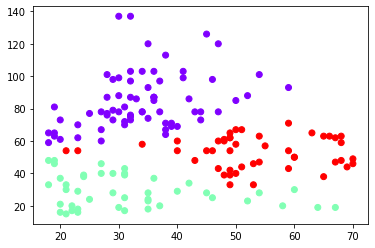

In [338]:
plt.scatter(train[:,0],train[:,1],c=kmedoids.labels_,cmap='rainbow')

In [339]:
y=data.Class

In [340]:
ind=['Genre','Annual Income (k$)','Age']

In [341]:
x=data[ind]

(array([42.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 47.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

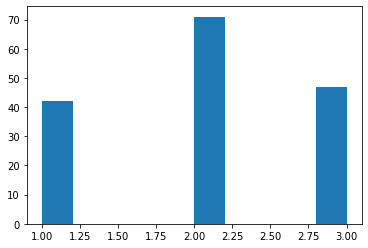

In [342]:
plt.hist(y)

In [343]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.01)

In [344]:
model = LinearRegression()

In [345]:
model.fit(x_train,y_train)

LinearRegression()

In [346]:
result = model.predict(x_test)

In [347]:
model.score(x_test,y_test)

0.23480969260648654

In [348]:
print(mean_absolute_error(y_test,result))

0.408085301338752
